In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt

In [ ]:
import kagglehub
import os
path=kagglehub.dataset_download("fatihilhan/electric-vehicle-specifications-and-prices")
print(path)

Using Colab cache for faster access to the 'electric-vehicle-specifications-and-prices' dataset.
/kaggle/input/electric-vehicle-specifications-and-prices


In [ ]:
file_path = path + "/EV_cars.csv"

df = pd.read_csv(file_path)
df.head()

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration..0.100.
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [ ]:
df.rename(columns={'acceleration..0.100.': 'acceleration'}, inplace=True)
display(df.head())

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4


In [ ]:
display (df.isna().sum())

,0
Battery,0
Car_name,0
Car_name_link,0
Efficiency,0
Fast_charge,2
Price.DE.,51
Range,0
Top_speed,0
acceleration,0


In [ ]:
df['Fast_charge'].fillna(df['Fast_charge']. median(), inplace=True)
df['Price.DE.'].fillna(df['Price.DE.'].median(),inplace=True)
display(df.isna().sum())

/tmp/ipython-input-1259660935.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fast_charge'].fillna(df['Fast_charge']. median(), inplace=True)
/tmp/ipython-input-1259660935.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

,0
Battery,0
Car_name,0
Car_name_link,0
Efficiency,0
Fast_charge,0
Price.DE.,0
Range,0
Top_speed,0
acceleration,0


In [ ]:
df['Brand'] = df['Car_name'].apply(lambda x: x.split(' ')[0])
display(df)

,Battery,Car_name,Car_name_link,Efficiency,Fast_charge,Price.DE.,Range,Top_speed,acceleration,Brand
0,75.0,Tesla Model Y Long Range Dual Motor,https://ev-database.org/car/1619/Tesla-Model-Y...,172,670.0,59017.0,435,217,5.0,Tesla
1,57.5,Tesla Model 3,https://ev-database.org/car/1991/Tesla-Model-3,137,700.0,46220.0,420,201,6.1,Tesla
2,60.5,BYD ATTO 3,https://ev-database.org/car/1782/BYD-ATTO-3,183,370.0,44625.0,330,160,7.3,BYD
3,61.7,MG MG4 Electric 64 kWh,https://ev-database.org/car/1708/MG-MG4-Electr...,171,630.0,39990.0,360,160,7.9,MG
4,75.0,Tesla Model 3 Long Range Dual Motor,https://ev-database.org/car/1992/Tesla-Model-3...,149,780.0,55220.0,505,201,4.4,Tesla
...,...,...,...,...,...,...,...,...,...,...
355,46.3,Citroen e-Jumpy Combi XL 50 kWh,https://ev-database.org/car/1596/Citroen-e-Jum...,257,290.0,52730.0,180,130,12.1,Citroen
356,46.3,Fiat E-Ulysse L2 50 kWh,https://ev-database.org/car/1721/Fiat-E-Ulysse...,250,290.0,55990.0,185,130,12.1,Fiat
357,46.3,Opel Vivaro-e Combi L 50 kWh,https://ev-database.org/car/1601/Opel-Vivaro-e...,257,290.0,51825.0,180,130,12.1,Opel
358,68.0,Opel Zafira-e Life M 75 kWh,https://ev-database.org/car/1348/Opel-Zafira-e...,257,290.0,69250.0,265,130,13.3,Opel


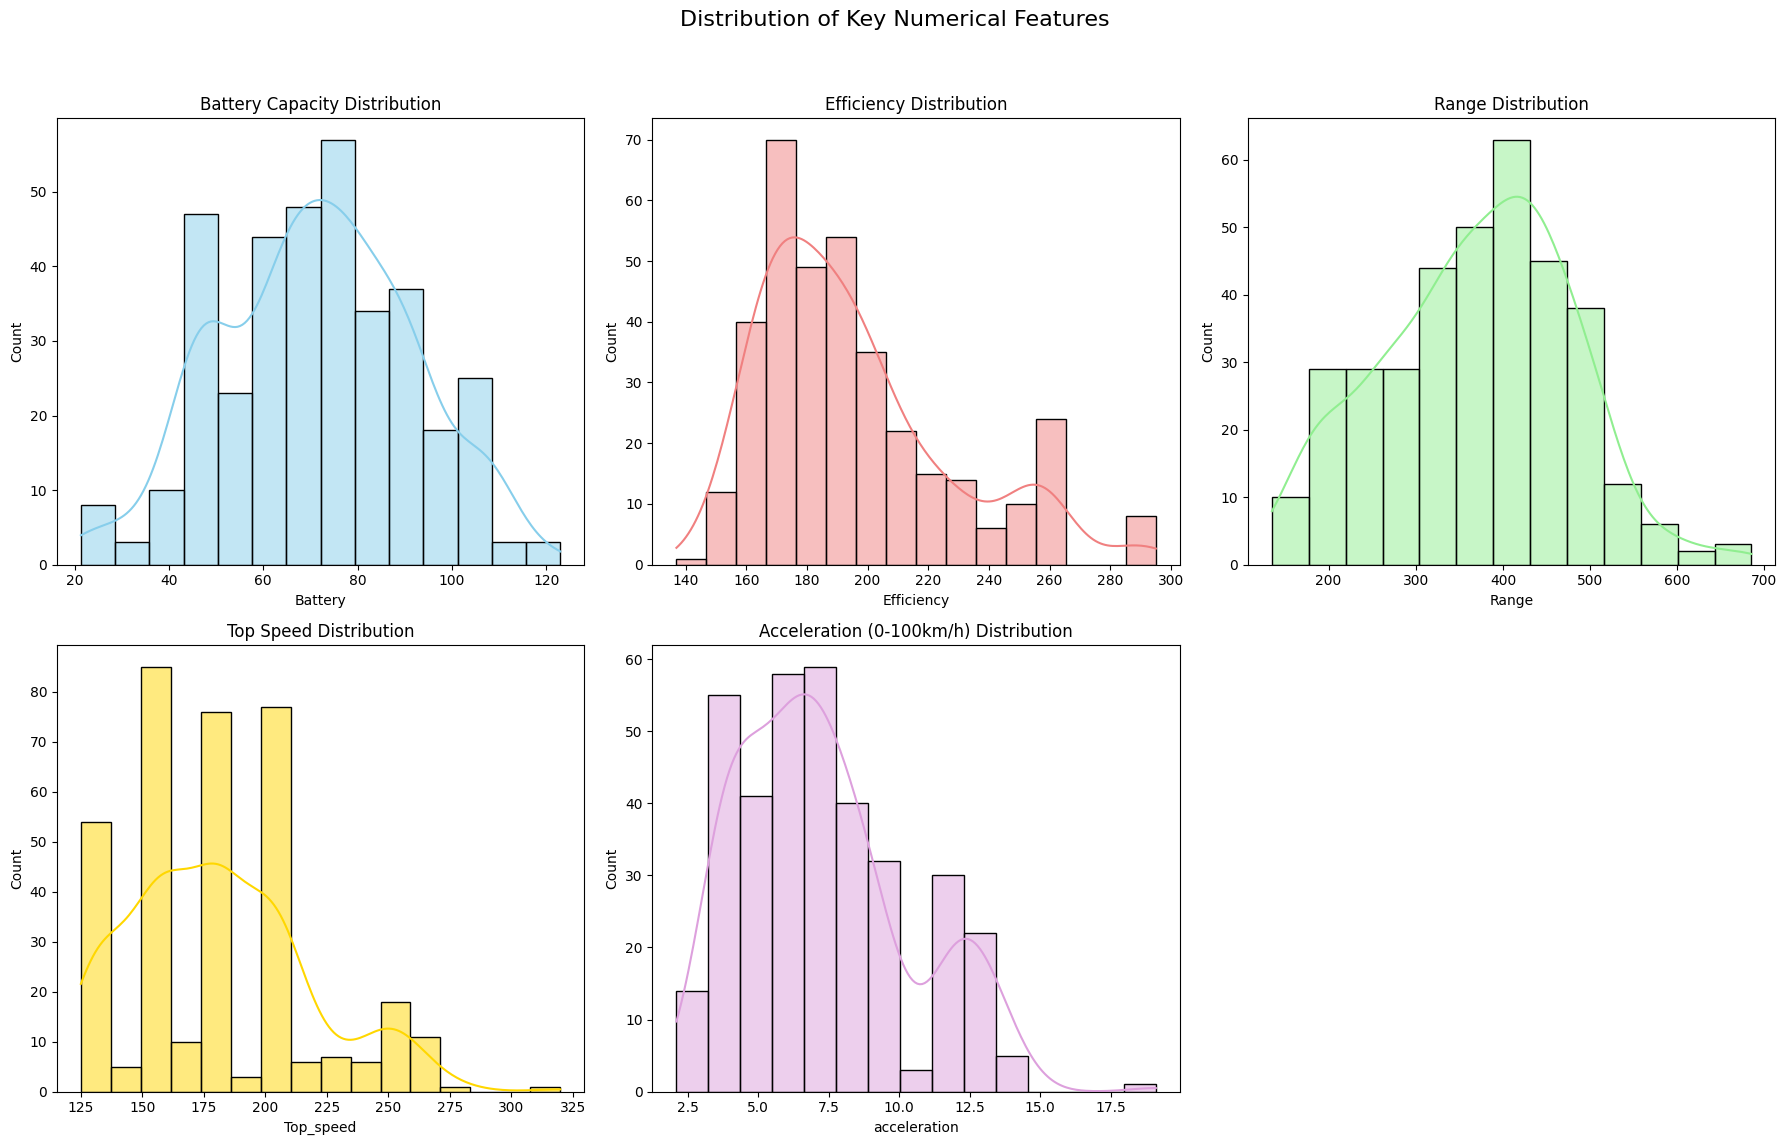

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Key Numerical Features', fontsize=16)

sns.histplot(df['Battery'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Battery Capacity Distribution')

sns.histplot(df['Efficiency'], kde=True, ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('Efficiency Distribution')

sns.histplot(df['Range'], kde=True, ax=axes[0, 2], color='lightgreen')
axes[0, 2].set_title('Range Distribution')

sns.histplot(df['Top_speed'], kde=True, ax=axes[1, 0], color='gold')
axes[1, 0].set_title('Top Speed Distribution')

sns.histplot(df['acceleration'], kde=True, ax=axes[1, 1], color='plum')
axes[1, 1].set_title('Acceleration (0-100km/h) Distribution')

# Hide the last empty subplot
axes[1, 2].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

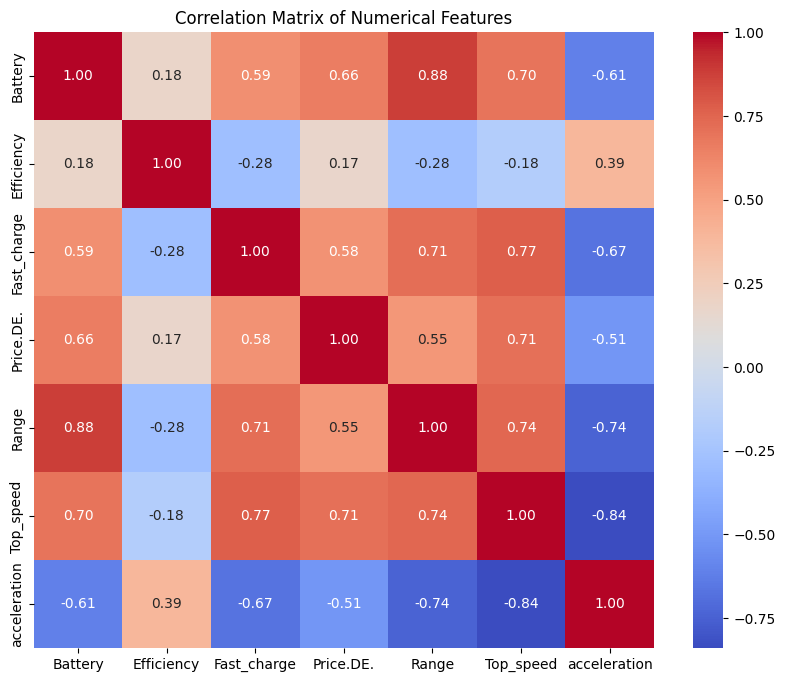

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

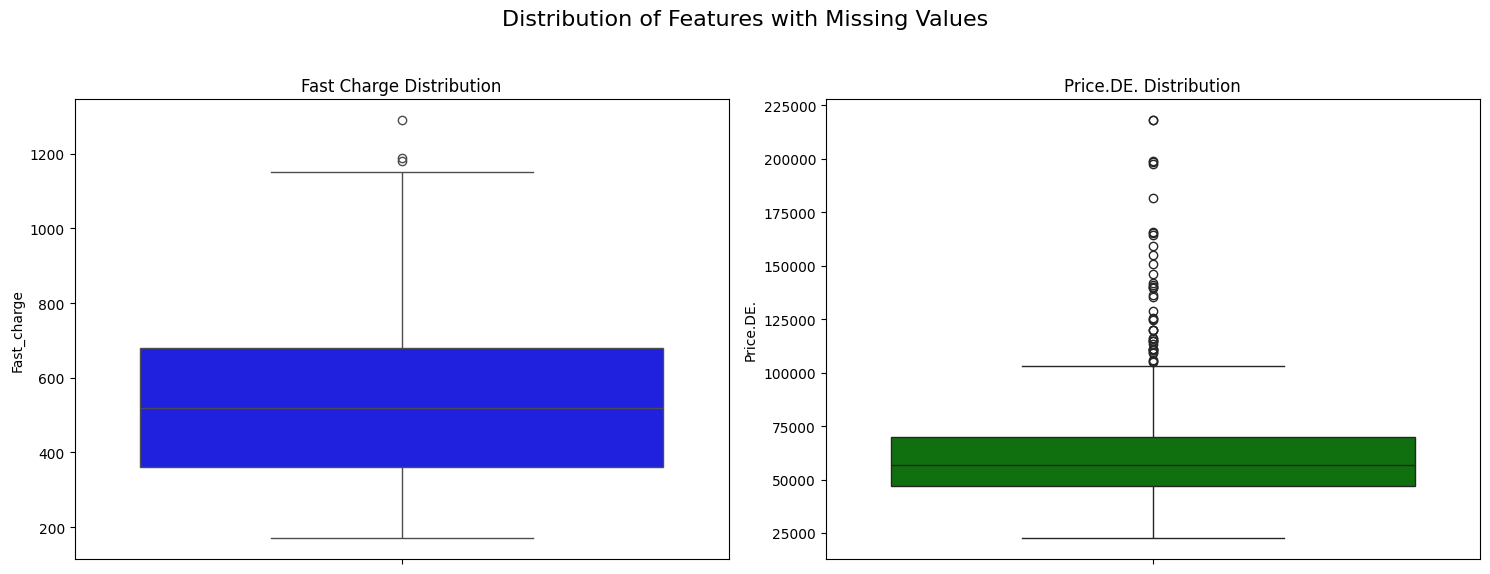

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Distribution of Features with Missing Values', fontsize=16)

sns.boxplot(y=df['Fast_charge'], ax=axes[0], color='blue')
axes[0].set_title('Fast Charge Distribution')

sns.boxplot(y=df['Price.DE.'], ax=axes[1], color='green')
axes[1].set_title('Price.DE. Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

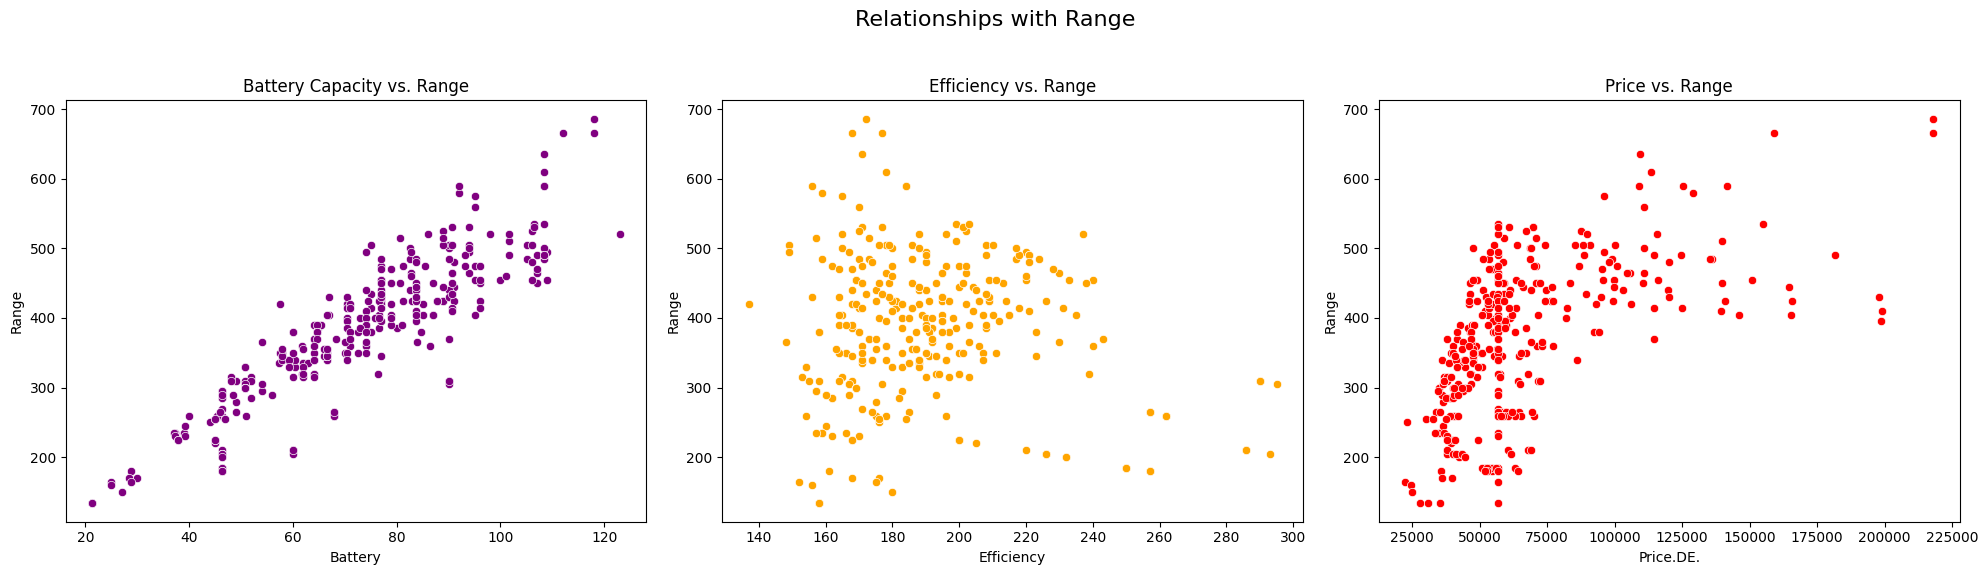

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Relationships with Range', fontsize=16)

sns.scatterplot(x='Battery', y='Range', data=df, ax=axes[0], color='purple')
axes[0].set_title('Battery Capacity vs. Range')

sns.scatterplot(x='Efficiency', y='Range', data=df, ax=axes[1], color='orange')
axes[1].set_title('Efficiency vs. Range')

sns.scatterplot(x='Price.DE.', y='Range', data=df, ax=axes[2], color='red')
axes[2].set_title('Price vs. Range')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

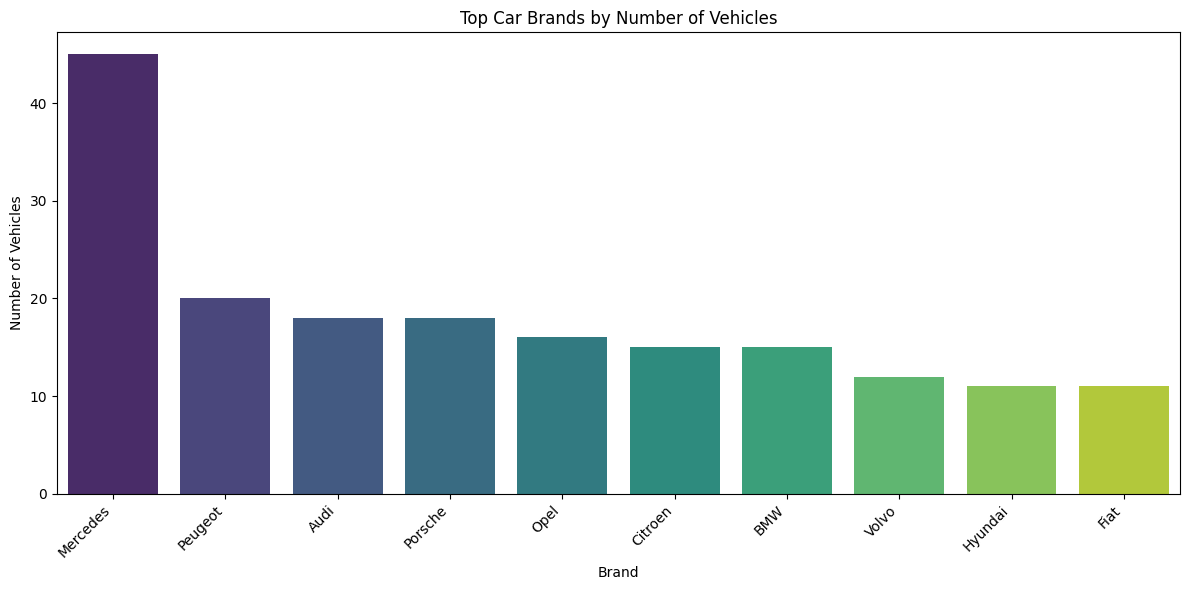

In [ ]:
top_brands = df['Brand'].value_counts().head(10) # Get top 10 brands for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, hue=top_brands.index, palette='viridis', legend=False)
plt.title('Top Car Brands by Number of Vehicles')
plt.xlabel('Brand')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

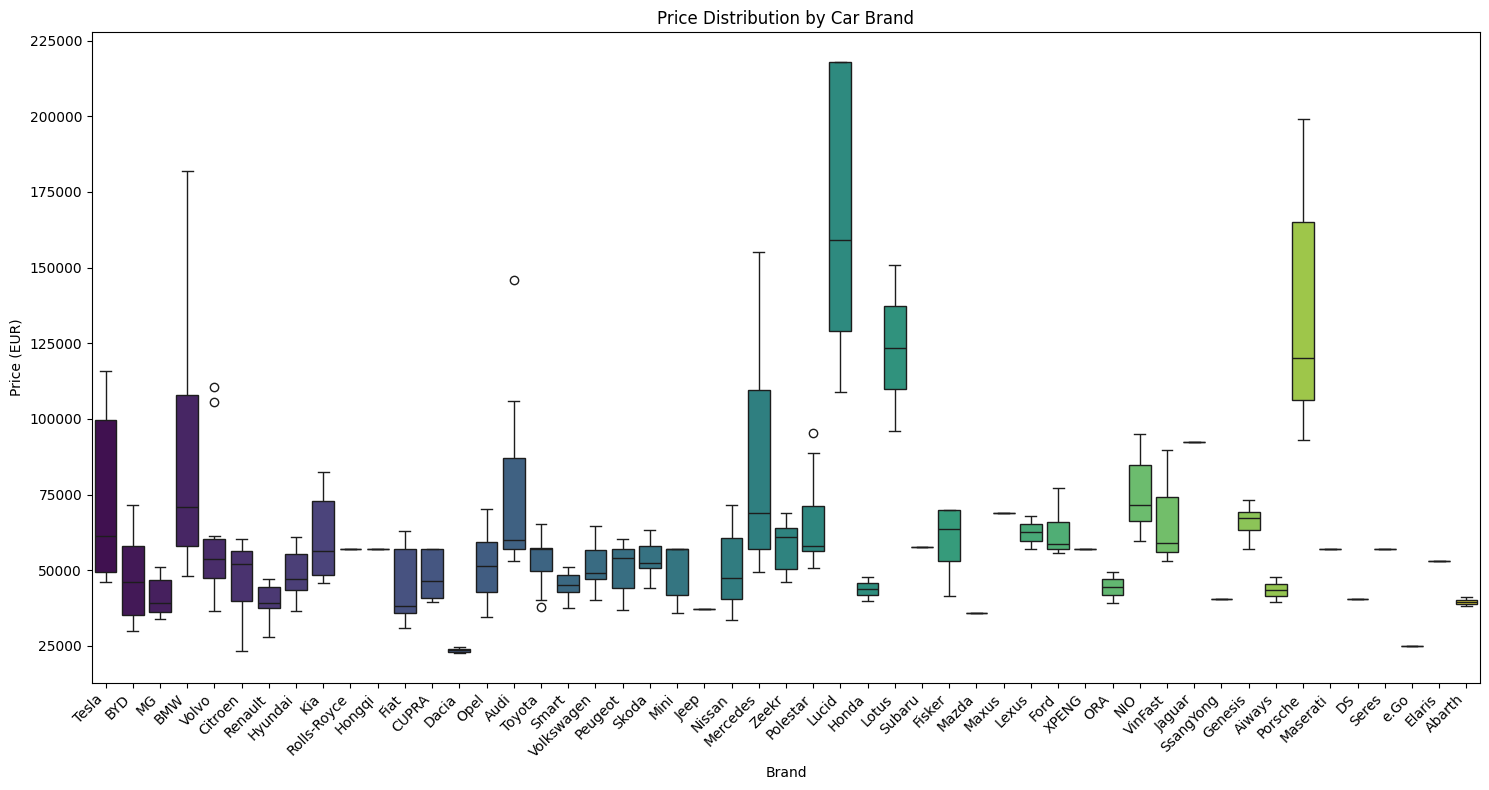

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Brand', y='Price.DE.', data=df, hue='Brand', palette='viridis', legend=False)
plt.title('Price Distribution by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Price (EUR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()